[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


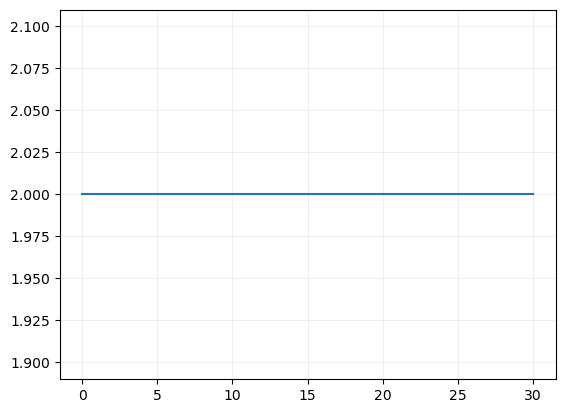

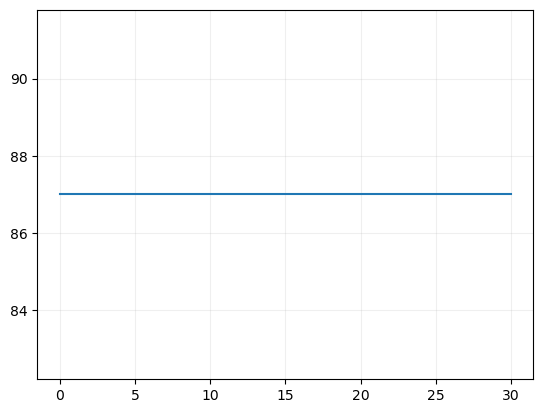

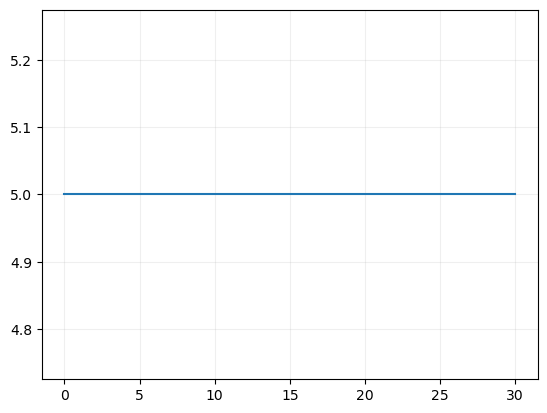

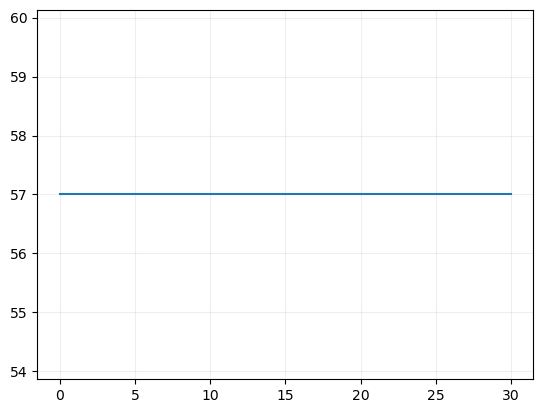

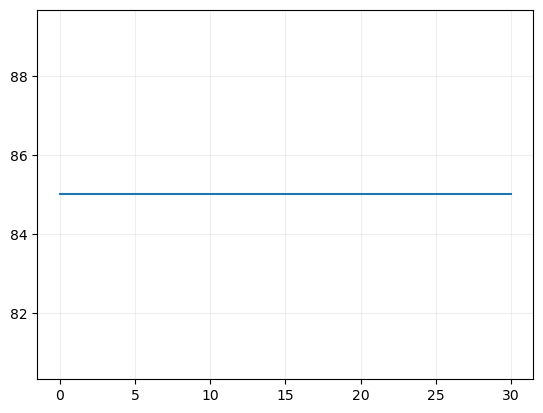

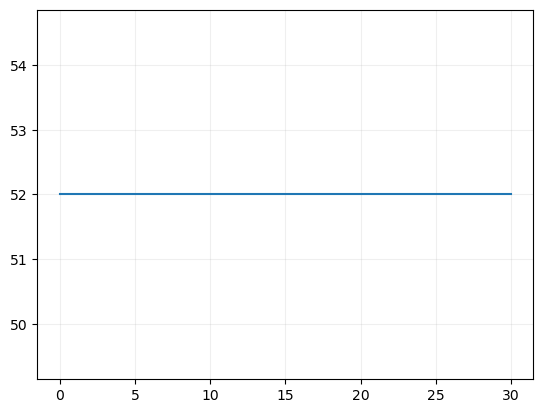

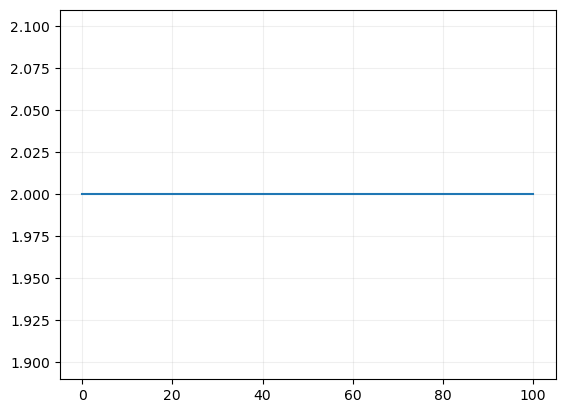

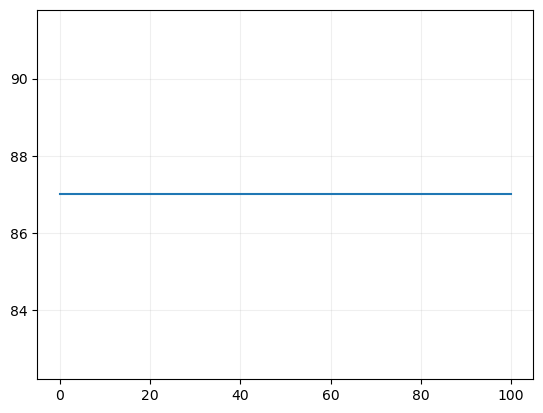

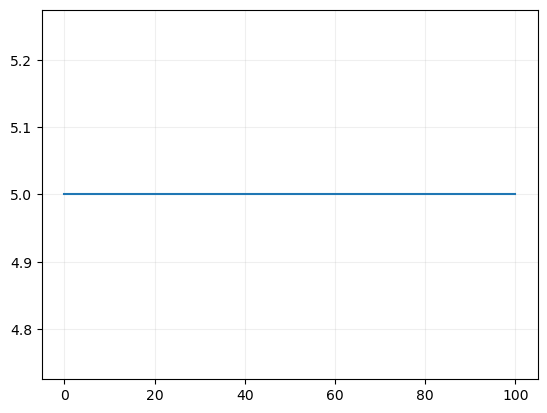

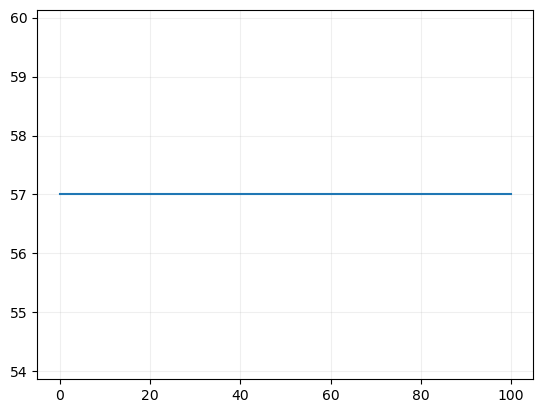

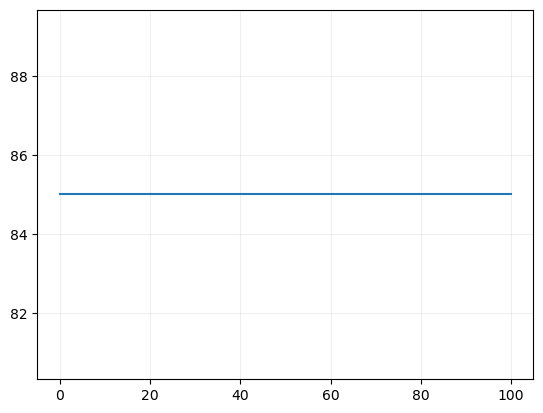

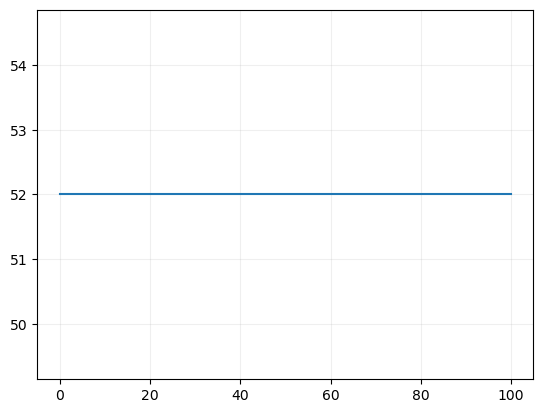

In [75]:
import torch
import matplotlib.pyplot as plt 
import numpy as np

input_tensor = np.zeros((1, 1, 88, 128))
input_tensor[0][0][87][10] = 100
input_tensor[0][0][2][57] = 100
input_tensor[0][0][2][43] = 100
input_tensor[0][0][2][21] = 100
input_tensor[0][0][2][46] = 100
input_tensor[0][0][2][5] = 100


def pixel_tracker(image_batch):
    top_row_indices = []
    bottom_row_indices = []
    left_col_indices = []
    right_col_indices = []
    for i in range(image_batch.shape[0]):
        # Find the row indices of the non-zero pixels
        nonzero_rows = torch.nonzero(image_batch[i, 0, :, :], as_tuple=True)[0]
        
        # Find the column indices of the non-zero pixels
        nonzero_cols = torch.nonzero(image_batch[i, 0, :, :], as_tuple=True)[1]
        
        # Find the index of the non-zero pixel closest to the top
        top_row_index = torch.argmin(nonzero_rows)
        top_row_indices.append(top_row_index)
        top_row_coords = nonzero_rows[top_row_indices], nonzero_cols[top_row_indices]
        
        # Find the index of the non-zero pixel closest to the bottom
        bottom_row_index = torch.argmax(nonzero_rows)
        bottom_row_indices.append(bottom_row_index)
        bottom_row_coords = nonzero_rows[bottom_row_indices], nonzero_cols[bottom_row_indices]

        # Find the index of the non-zero pixel closest to the left
        left_col_index = torch.argmin(nonzero_cols)
        left_col_indices.append(left_col_index)
        left_col_coords = nonzero_rows[left_col_indices], nonzero_cols[left_col_indices]
        
        # Find the index of the non-zero pixel closest to the right
        right_col_index = torch.argmax(nonzero_cols)
        right_col_indices.append(right_col_index)
        right_col_coords = nonzero_rows[right_col_indices], nonzero_cols[right_col_indices]
        
    return nonzero_rows[top_row_indices], nonzero_rows[bottom_row_indices], nonzero_cols[left_col_indices], nonzero_cols[right_col_indices]


height_of_q_block = 100
width_of_q_block = 30
x = np.arange(0, width_of_q_block + 1 ,1)
print(x)

y = np.arange(0, height_of_q_block + 1 ,1)
print(y)

x_test_images = [input_tensor]*len(x)

y_test_images = [input_tensor]*len(y)


def track (images):
    y_min_tracking_data = []
    y_max_tracking_data = []
    x_min_tracking_data = []
    x_max_tracking_data = []
    for image in images:
        input_tensor = torch.tensor(image)#.unsqueeze(0).unsqueeze(0
        y_min_tracking, y_max_tracking, x_min_tracking, x_max_tracking = pixel_tracker(input_tensor)
        y_min_tracking_data.append(y_min_tracking)
        y_max_tracking_data.append(y_max_tracking)
        x_min_tracking_data.append(x_min_tracking)
        x_max_tracking_data.append(x_max_tracking)
    return y_min_tracking_data, y_max_tracking_data, x_min_tracking_data, x_max_tracking_data
#print(y_min_tracking_data, y_max_tracking_data, x_min_tracking_data, x_max_tracking_data)

y_min_tracking_data, y_max_tracking_data, x_min_tracking_data, x_max_tracking_data = track(x_test_images)
plt.plot(x, y_min_tracking_data)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()

plt.plot(x, y_max_tracking_data)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()

plt.plot(x, x_min_tracking_data)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()

plt.plot(x, x_max_tracking_data)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()

plt.plot(x, np.array(y_max_tracking_data) - np.array(y_min_tracking_data))
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()

plt.plot(x, np.array(x_max_tracking_data) - np.array(x_min_tracking_data))
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()


#pl;ot same again but for y 
y_min_tracking_data, y_max_tracking_data, x_min_tracking_data, x_max_tracking_data = track(y_test_images)

plt.plot(y, y_min_tracking_data)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()

plt.plot(y, y_max_tracking_data)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()

plt.plot(y, x_min_tracking_data)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()

plt.plot(y, x_max_tracking_data)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()

plt.plot(y, np.array(y_max_tracking_data) - np.array(y_min_tracking_data))
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()

plt.plot(y, np.array(x_max_tracking_data) - np.array(x_min_tracking_data))
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.grid(alpha=0.2)
plt.show()



[(tensor(2), tensor(87), tensor(5), tensor(57)), (tensor(2), tensor(87), tensor(5), tensor(57)), (tensor(2), tensor(87), tensor(5), tensor(57)), (tensor(2), tensor(87), tensor(5), tensor(57)), (tensor(2), tensor(87), tensor(5), tensor(57)), (tensor(2), tensor(87), tensor(5), tensor(57))]
